In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # used to make training & test sets
from sklearn import tree # Decision tree induction
import graphviz # for visualizing trees
from sklearn.naive_bayes import GaussianNB # The naive bayes algorithm
from sklearn.neighbors import KNeighborsClassifier # The k-nearest-neighbors algorithm
from matplotlib.colors import ListedColormap # Create custom color maps

In [30]:
# Read in titanic dataset as csv
titanic = pd.read_csv("~/share/Datasets/titanic.tsv", sep="\t")
titanic.head()

,Class,Age,Sex,Survived
0,First,Adult,Male,Yes
1,First,Adult,Male,Yes
2,First,Adult,Male,Yes
3,First,Adult,Male,Yes
4,First,Adult,Male,Yes


In [31]:

titanic["Class"] = titanic["Class"].replace(['First', 'Second', 'Third', 'Crew'], [1, 2, 3, 4])
titanic.head()

,Class,Age,Sex,Survived
0,1,Adult,Male,Yes
1,1,Adult,Male,Yes
2,1,Adult,Male,Yes
3,1,Adult,Male,Yes
4,1,Adult,Male,Yes


In [32]:
titanic["Age"] = titanic["Age"].replace(['Adult', 'Child'], [1, 2])
titanic.head()

,Class,Age,Sex,Survived
0,1,1,Male,Yes
1,1,1,Male,Yes
2,1,1,Male,Yes
3,1,1,Male,Yes
4,1,1,Male,Yes


In [33]:
titanic["Sex"] = titanic["Sex"].replace(['Male', 'Female'], [1, 2])
titanic.head()

,Class,Age,Sex,Survived
0,1,1,1,Yes
1,1,1,1,Yes
2,1,1,1,Yes
3,1,1,1,Yes
4,1,1,1,Yes


In [34]:
titanic["Survived"] = titanic["Survived"].replace(['Yes', 'No'], [1, 2])
titanic.head()

,Class,Age,Sex,Survived
0,1,1,1,1
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


In [35]:
# Separate the data into training and test sets with the test set 20% of the total
training_set, test_set = train_test_split(titanic, test_size=0.20)
# Use the first two features for training
training_features = training_set.iloc[:, 0:3]
# Targets are at the end
training_targets = training_set.iloc[:, 3]

In [36]:
# Pull out the same features and targets from test set
testing_features = test_set.iloc[:, 0:3]
testing_targets = test_set.iloc[:, 3]

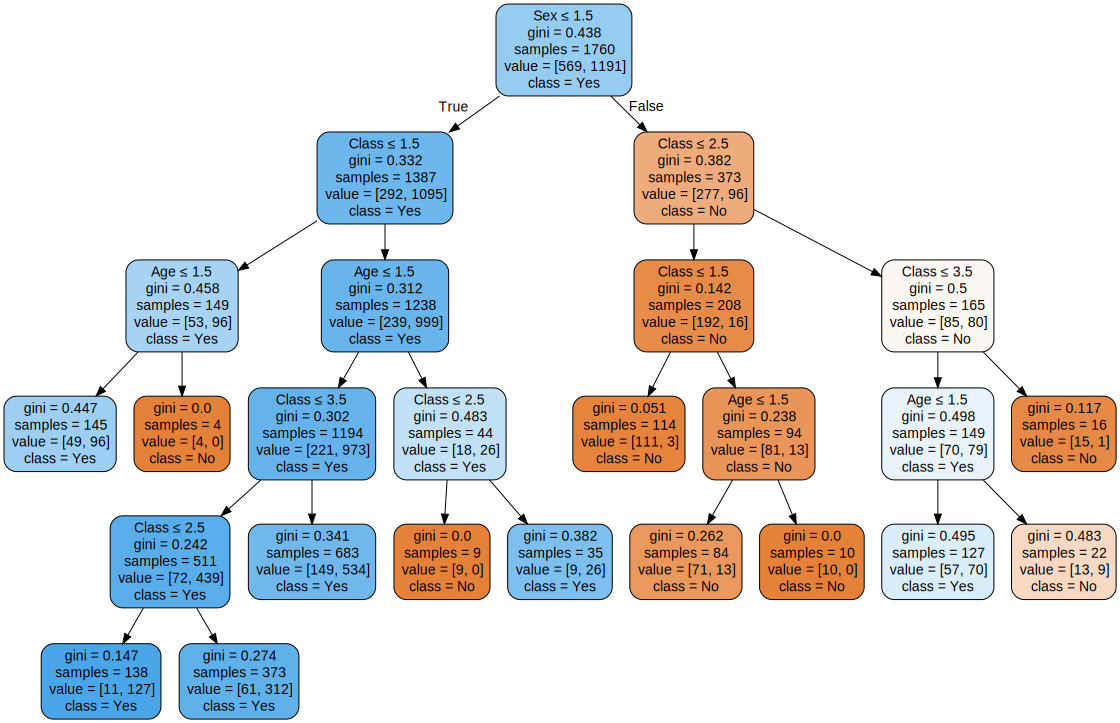

In [37]:
dtfull = tree.DecisionTreeClassifier(criterion="gini")
dtfull = dtfull.fit(training_features, training_targets)
dot_data = tree.export_graphviz(dtfull, out_file=None, 
                                class_names=['No', 'Yes'],
                                feature_names=titanic.columns[0:3],
                                impurity=True,
                                filled=True, rounded=True,
                                special_characters=True) 


graph = graphviz.Source(dot_data)  
graph

In [38]:
# for testing accuracy
full_predictions = dtfull.predict(testing_features)
full_accuracy = (full_predictions == testing_targets).sum() / testing_targets.shape[0]
print("Testing Accuracy = ", full_accuracy)

Testing Accuracy =  0.7687074829931972


In [39]:
cm_full = confusion_matrix(testing_targets, full_predictions)
cm_full

array([[ 51,  91],
       [ 11, 288]])

In [40]:
# Confusion matrix plotter from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 51  91]
 [ 11 288]]
Normalized confusion matrix
[[0.35915493 0.64084507]
 [0.0367893  0.9632107 ]]


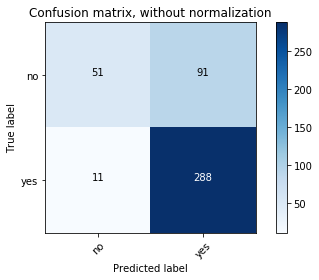

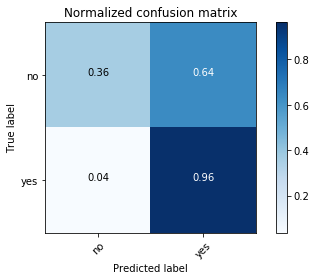

In [41]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_full, classes=["no", "yes"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_full, classes=["no", "yes"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

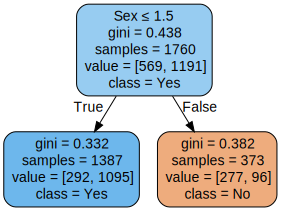

In [42]:
dtfull1 = tree.DecisionTreeClassifier(criterion="gini", max_depth=1)
dtfull1 = dtfull1.fit(training_features, training_targets)
dot_data = tree.export_graphviz(dtfull1, out_file=None, 
                                class_names=['No', 'Yes'],
                                feature_names=titanic.columns[0:3],
                                impurity=True,
                                filled=True, rounded=True,
                                special_characters=True) 


graph = graphviz.Source(dot_data)  
graph

In [43]:
# Now for testing accuracy
full_predictions = dtfull1.predict(testing_features)
full_accuracy = (full_predictions == testing_targets).sum() / testing_targets.shape[0]
print("Testing Accuracy = ", full_accuracy)

Testing Accuracy =  0.7619047619047619


In [44]:
cm_full1 = confusion_matrix(testing_targets, full_predictions)
cm_full1

array([[ 67,  75],
       [ 30, 269]])

In [45]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 67  75]
 [ 30 269]]
Normalized confusion matrix
[[0.47183099 0.52816901]
 [0.10033445 0.89966555]]


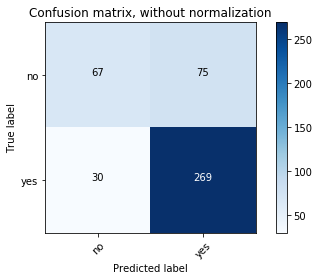

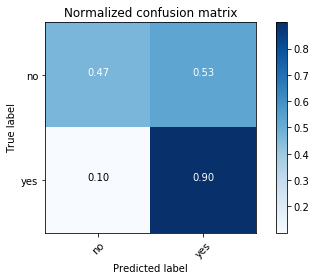

In [46]:
plt.figure()
plot_confusion_matrix(cm_full1, classes=["no", "yes"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_full1, classes=["no", "yes"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [ ]:
#This project focuses on decision trees and starts with the titanic data set.

#First, separates the data into training and test sets. The test set is 20% of the total data. 

#Second, builds a decision tree based on the training data. The defaults for building a tree are fine (gini impurity). 

#Third, produces a confusion matrix from the trees predictions on the test data. From the matrix it calculates performance measures from the confusion matrix, especially f1 score. 

#Fourth, builds a second decision tree. This tree will be restricted to have a max-depth of one. This pre-pruning results in a much smaller tree. 

#Fifth, produces a confusion matrix and calculate performance measures for this second tree.

#Here the accuracy from the first decision tree is 76.87 % and the second decision tree is 76.19%. We don't see much difference in the accuracy (f1score). However, the decision tree is very small and we can read it better than the first decision tree. 